### Importing all the necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression as lr
from sklearn.model_selection import train_test_split as tt
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt

### Loading the clean Student Performance DataFile

In [2]:
df=pd.read_csv('StudentsPerformance_clean.csv')

### Creating a linear model

In [3]:
model=lr()

## #Prediction of Math score

In [4]:
#features
X = df[['test preparation course_mapped','gender_mapped','writing score','reading score','grade_mapped','pass/fail_mapped']]
# target values 
y = df['math score']

In [5]:
X_train,X_test,y_train,y_test=tt(X,y,test_size=0.2,random_state=123)

### Fitting the X_train anf y_train in linear model

In [6]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [7]:
model.score(X_test,y_test)

0.8716183624089698

### Predicting the math score with X_test

In [8]:
prediction=model.predict(X_test)
prediction

array([38.80268653, 62.19474453, 55.84033647, 67.65418428, 61.11223094,
       66.62008847, 76.93592242, 54.09899287, 75.09902675, 74.25192209,
       57.91109509, 85.55699292, 59.65316806, 69.48979645, 65.06701951,
       28.54135355, 47.31298041, 69.11453066, 83.8640671 , 74.62847138,
       77.40519429, 86.96892152, 82.8669094 , 33.81251865, 86.3967309 ,
       79.80764327, 90.12193123, 71.51342078, 64.50091207, 42.66063953,
       78.81939825, 69.35858978, 86.91442055, 80.13478292, 51.68990657,
       61.77260695, 48.86604937, 26.60308511, 67.1922791 , 59.32302368,
       78.25229895, 71.85303197, 80.13577478, 69.72494289, 66.28938997,
       68.68956359, 23.30867255, 66.99535426, 75.2873014 , 66.8554974 ,
       76.88978   , 69.39552788, 68.73669787, 46.84242504, 63.37152669,
       69.59399871, 46.88929683, 65.44356881, 55.65206183, 73.4988235 ,
       80.60633015, 58.71261145, 77.68846687, 49.24259866, 42.18295567,
       89.37037864, 84.66403748, 66.80707962, 64.45377779, 88.71

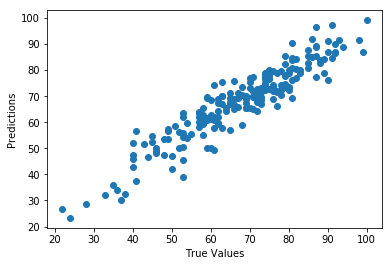

In [9]:
plt.scatter(y_test, prediction)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

### Fitting X and y in RandomForestClassifier

In [10]:
clf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0);
clf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

### Checking the important features

In [11]:
clf.feature_importances_

array([0.01866689, 0.05182251, 0.19263555, 0.27258108, 0.39781667,
       0.06647729])

In [12]:
feature=['test preparation course_mapped','gender_mapped','writing score','reading score','grade_mapped','pass/fail_mapped']
feature_imp=pd.DataFrame({'feature':feature,'importance':clf.feature_importances_})
feature_imp

,feature,importance
0,test preparation course_mapped,0.018667
1,gender_mapped,0.051823
2,writing score,0.192636
3,reading score,0.272581
4,grade_mapped,0.397817
5,pass/fail_mapped,0.066477


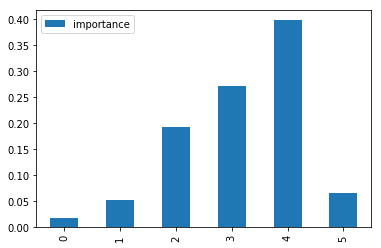

In [13]:
feature_imp.plot.bar()

### Removing the least important feature i.e test preparation course_mapped

In [14]:
X1=df[['gender_mapped','writing score','reading score','grade_mapped','pass/fail_mapped']]

In [15]:
clf.fit(X1,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [16]:
clf.feature_importances_

array([0.02296141, 0.19296709, 0.31030068, 0.40777419, 0.06599663])

In [17]:
feature1=['gender_mapped','writing score','reading score','grade_mapped','pass/fail_mapped']
feature_imp1=pd.DataFrame({'feature':feature1,'importance':clf.feature_importances_})
feature_imp1

,feature,importance
0,gender_mapped,0.022961
1,writing score,0.192967
2,reading score,0.310301
3,grade_mapped,0.407774
4,pass/fail_mapped,0.065997


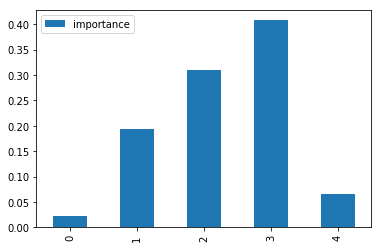

In [18]:
feature_imp1.plot.bar()

### Prediciting math score without test preparation course

In [19]:
X1_train,X1_test,y1_train,y1_test=tt(X1,y,test_size=0.2,random_state=123)

### Fitting X1_train and y1_train in linear model

In [20]:
model.fit(X1_train,y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [21]:
model.score(X1_test,y1_test)

0.865439439830358

In [22]:
prediction1=model.predict(X1_test)
prediction1

array([40.7485863 , 61.37776986, 55.46023624, 66.33733107, 60.22846476,
       67.84897698, 78.08993152, 54.00520546, 73.62859144, 73.07375519,
       57.06812987, 84.9633987 , 58.58093853, 68.48307843, 66.64305676,
       28.81959684, 47.01967077, 70.30045002, 86.16931893, 73.57197632,
       75.83095392, 86.26556665, 84.2962083 , 33.53004748, 87.55162816,
       81.09740356, 87.8904428 , 69.74561377, 63.58013234, 41.84127628,
       80.63881503, 71.17711839, 87.95360157, 77.74457323, 50.82992688,
       63.98210575, 48.225591  , 26.83325597, 66.56291547, 58.37029782,
       76.38579017, 73.62859144, 78.93467368, 67.9452247 , 65.38052141,
       67.14127788, 24.17230496, 66.03160538, 73.877702  , 68.44344583,
       78.93467368, 67.79236186, 67.48663617, 46.96305565, 63.21779153,
       71.77158724, 46.17609136, 67.14127788, 55.21112568, 72.07731293,
       78.9912888 , 60.72552314, 76.82855892, 48.72381212, 42.21297241,
       90.34191585, 86.37879689, 65.78249482, 63.23477405, 87.72

In [23]:
compare_two_perdictions = pd.DataFrame({'With test preparation course':prediction,'Without test preparation course':prediction1})
compare_two_perdictions

,With test preparation course,Without test preparation course
0,38.802687,40.748586
1,62.194745,61.377770
2,55.840336,55.460236
3,67.654184,66.337331
4,61.112231,60.228465
5,66.620088,67.848977
6,76.935922,78.089932
7,54.098993,54.005205
8,75.099027,73.628591
9,74.251922,73.073755


## #Prediction of Reading Score

In [24]:
#features
X = df[['test preparation course_mapped','gender_mapped','writing score','math score','grade_mapped','pass/fail_mapped']]
# target values 
y = df['reading score']

In [25]:
X_train,X_test,y_train,y_test=tt(X,y,test_size=0.33,random_state=234)

In [26]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [27]:
model.score(X_test,y_test)

0.927515936536788

In [28]:
read_prediction=model.predict(X_test)
read_prediction

array([53.77044959, 87.29843982, 76.46650945, 68.96232409, 65.65581941,
       70.55540356, 78.46959929, 79.26383091, 53.00907876, 90.46618745,
       75.3901475 , 47.66662344, 85.59185929, 75.90797925, 94.00839355,
       49.12206009, 79.85218255, 36.51773269, 72.29525326, 66.24417105,
       87.26861838, 75.61380343, 60.49478232, 67.15195451, 72.1794187 ,
       72.66971174, 69.16820408, 69.55067573, 41.29171951, 71.43793102,
       85.40778758, 76.67700565, 74.07007095, 56.01035509, 67.73054337,
       92.24100513, 75.66426465, 80.98590466, 66.2848695 , 57.33043164,
       87.24569588, 90.47595022, 65.53022209, 62.98409527, 63.38609247,
       80.12912873, 75.76693948, 75.37008883, 64.84381184, 66.20458684,
       71.6793629 , 78.29640457, 35.73326383, 64.26861993, 64.91433173,
       79.57578268, 73.16000477, 56.22424825, 55.52006206, 53.8685082 ,
       50.4243607 , 59.11962833, 59.98492614, 72.75339135, 64.56741197,
       82.09263436, 76.52386961, 41.33241795, 73.30337804, 65.43

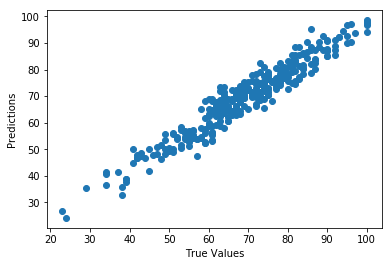

In [29]:
plt.scatter(y_test, read_prediction)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

### Fitting X and y in RandomForestClassifier

In [30]:
clf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0);
clf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

### Checking the important features

In [31]:
feature=['test preparation course_mapped','gender_mapped','writing score','math score','grade_mapped','pass/fail_mapped']
feature_imp=pd.DataFrame({'feature':feature,'importance':clf.feature_importances_})
feature_imp

,feature,importance
0,test preparation course_mapped,0.021354
1,gender_mapped,0.032109
2,writing score,0.376985
3,math score,0.198998
4,grade_mapped,0.322099
5,pass/fail_mapped,0.048454


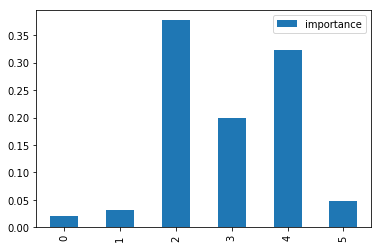

In [32]:
feature_imp.plot.bar()

#### Since the least important feature is test preparation course_mapped lets remove that feature

### Removing the least important feature i.e test preparation course_mapped and fitting new features in RandomForestClassifier

In [33]:
X1=df[['gender_mapped','writing score','reading score','grade_mapped','pass/fail_mapped']]
clf.fit(X1,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

### Again, Checking important features

In [34]:
feature1=['gender_mapped','writing score','math score','grade_mapped','pass/fail_mapped']
feature_imp1=pd.DataFrame({'feature':feature1,'importance':clf.feature_importances_})
feature_imp1

,feature,importance
0,gender_mapped,0.011718
1,writing score,0.219153
2,math score,0.540799
3,grade_mapped,0.199431
4,pass/fail_mapped,0.028900


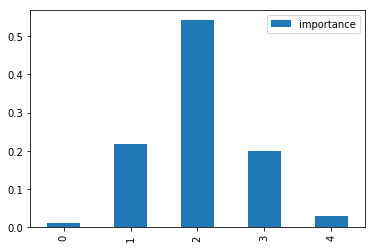

In [35]:
feature_imp1.plot.bar()

### Prediciting reading score without test preparation course

In [36]:
X1_train,X1_test,y1_train,y1_test=tt(X1,y,test_size=0.33,random_state=123)

### Fitting X1_train and y1_train in linear model

In [37]:
model.fit(X1_train,y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [38]:
model.score(X1_test,y1_test)

1.0

In [39]:
prediction1=model.predict(X1_test)
prediction1

array([ 37.,  69.,  55.,  76.,  66.,  74.,  75.,  54.,  70.,  71.,  55.,
        85.,  61.,  83.,  74.,  23.,  58.,  79.,  85.,  73.,  74.,  87.,
        95.,  29., 100.,  87.,  79.,  80.,  73.,  43.,  90.,  65., 100.,
        72.,  62.,  73.,  58.,  39.,  61.,  57.,  73.,  70.,  88.,  76.,
        77.,  76.,  38.,  78.,  71.,  78.,  88.,  77.,  79.,  61.,  78.,
        69.,  53.,  76.,  54.,  67.,  85.,  60.,  86.,  60.,  50.,  84.,
        81.,  77.,  70.,  88.,  80.,  52.,  61.,  68.,  67.,  81.,  72.,
        87.,  52.,  58.,  66.,  75.,  75.,  81.,  81., 100.,  67.,  51.,
        83.,  83.,  52.,  59.,  71.,  73.,  79.,  81.,  80.,  63.,  81.,
        70.,  64.,  75.,  86.,  74.,  74.,  43.,  76.,  63.,  68.,  74.,
        86.,  45.,  82.,  66.,  67.,  74.,  96.,  53.,  44.,  82.,  92.,
        77.,  81.,  51., 100.,  91.,  66.,  44.,  84.,  78.,  52.,  58.,
        70.,  62.,  85.,  82.,  70.,  75.,  84.,  50.,  46.,  68.,  79.,
        55.,  92.,  59.,  82.,  41.,  68.,  70.,  6

### Comparing Predicitons with and without test preparation course

In [40]:
compare_two_perdictions = pd.DataFrame({'With test preparation course':read_prediction,'Without test preparation course':prediction1})
compare_two_perdictions

,With test preparation course,Without test preparation course
0,53.770450,37.0
1,87.298440,69.0
2,76.466509,55.0
3,68.962324,76.0
4,65.655819,66.0
5,70.555404,74.0
6,78.469599,75.0
7,79.263831,54.0
8,53.009079,70.0
9,90.466187,71.0


##  #Predicition of Writing Score

In [41]:
#features
X = df[['test preparation course_mapped','gender_mapped','reading score','math score','grade_mapped','pass/fail_mapped']]
# target values 
y = df['writing score']

In [42]:
X_train,X_test,y_train,y_test=tt(X,y,test_size=0.2,random_state=234)

### Fitting X_train and y_train in Linear Model`

In [43]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [44]:
model.score(X_test,y_test)

0.942640330247306

In [45]:
write_predict=model.predict(X_test)
write_predict

array([ 50.99098074,  90.89870354,  74.37744064,  71.25691645,
        65.74430643,  64.94883747,  77.16888358,  78.23930422,
        51.23295377,  90.19534156,  80.0203015 ,  45.55725118,
        80.03692338,  78.99232702, 100.26733173,  46.74452968,
        78.50841049,  34.17289687,  70.43807326,  65.45044927,
        83.19989373,  78.85777388,  61.81737036,  65.03356335,
        67.10273882,  69.95415674,  64.17674275,  69.83713242,
        35.33542448,  72.10805809,  88.10863727,  75.73724969,
        75.52243944,  54.03830343,  68.3441469 ,  94.7167443 ,
        71.66642127,  77.81089392,  68.05613515,  54.59542145,
        90.45259797,  87.71682771,  68.26526644,  62.17630002,
        62.31669856,  83.19989373,  72.45742147,  66.46519723,
        65.51180091,  67.54867794,  74.61132282,  72.82894889,
        34.56470642,  63.28332141,  67.37184509,  80.35075941,
        73.93150152,  52.53947249,  54.00170269,  52.91237657,
        49.26548969,  58.3227319 ,  59.9055408 ,  73.23

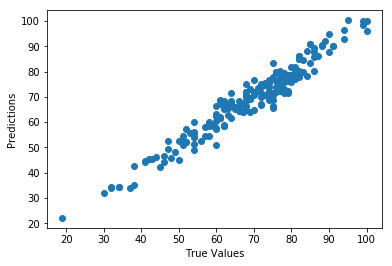

In [46]:
plt.scatter(y_test, write_predict)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

### Fitting X and y in RandomForestClassifier

In [47]:
clf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0);
clf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

### Checking the important features

In [48]:
feature=['test preparation course_mapped','gender_mapped','reading score','math score','grade_mapped','pass/fail_mapped']
feature_imp=pd.DataFrame({'feature':feature,'importance':clf.feature_importances_})
feature_imp

,feature,importance
0,test preparation course_mapped,0.027483
1,gender_mapped,0.030759
2,reading score,0.372591
3,math score,0.185739
4,grade_mapped,0.332022
5,pass/fail_mapped,0.051405


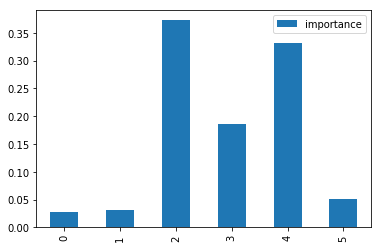

In [49]:
feature_imp.plot.bar()

#### Since the least important feature is test preparation course_mapped and gender_mapped lets remove those feature

### Removing the least important features i.e test preparation course_mapped & gender_mapped and fitting new features in RandomForestClassifier

In [50]:
X1=df[['reading score','reading score','grade_mapped','pass/fail_mapped']]
clf.fit(X1,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

### Again, Checking important features

In [51]:
feature1=['reading score','math score','grade_mapped','pass/fail_mapped']
feature_imp1=pd.DataFrame({'feature':feature1,'importance':clf.feature_importances_})
feature_imp1

,feature,importance
0,reading score,0.412440
1,math score,0.404821
2,grade_mapped,0.182739
3,pass/fail_mapped,0.000000


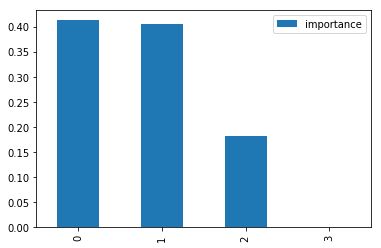

In [52]:
feature_imp1.plot.bar()

#### Since pass/fail_mapped has no importance at all lets remove that as well

In [53]:
X2=df[['reading score','reading score','grade_mapped']]
clf.fit(X2,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [54]:
feature2=['reading score','math score','grade_mapped']
feature_imp2=pd.DataFrame({'feature':feature2,'importance':clf.feature_importances_})
feature_imp2

,feature,importance
0,reading score,0.320555
1,math score,0.392631
2,grade_mapped,0.286814


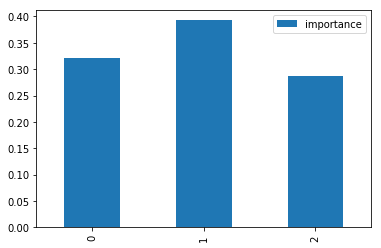

In [55]:
feature_imp2.plot.bar()

### Prediciting reading score without test preparation course,gender and pass/fail

In [56]:
X1_train,X1_test,y1_train,y1_test=tt(X2,y,test_size=0.2,random_state=234)

### Fitting X1_train and y1_train in linear model

In [57]:
model.fit(X1_train,y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [58]:
model.score(X1_test,y1_test)

0.9238656134526276

In [59]:
prediction1=model.predict(X1_test)
prediction1

array([52.62591152, 90.83214931, 73.30715542, 72.49465542, 65.36965542,
       64.55715542, 73.30715542, 78.05715542, 54.13216763, 85.20714931,
       75.68215542, 46.28216152, 82.08214931, 74.86965542, 97.08214931,
       50.21966152, 76.43215542, 32.69466763, 67.68215542, 62.99465542,
       86.76964931, 75.68215542, 61.34466152, 70.86965542, 66.93215542,
       69.30715542, 67.68215542, 68.49465542, 32.69466763, 71.74465542,
       90.83214931, 74.86965542, 74.86965542, 56.59466152, 67.68215542,
       91.58214931, 75.68215542, 76.43215542, 70.86965542, 51.81341152,
       89.20714931, 87.64464931, 66.93215542, 62.99465542, 67.68215542,
       86.76964931, 70.86965542, 69.30715542, 65.36965542, 66.93215542,
       73.30715542, 75.68215542, 35.91341763, 66.11965542, 65.36965542,
       76.43215542, 73.30715542, 50.21966152, 58.15716152, 55.03216152,
       51.81341152, 57.40716152, 61.43215542, 73.30715542, 66.11965542,
       82.08214931, 75.68215542, 35.10091763, 64.55715542, 64.55

### Comparing Predicitons with and without test preparation course, gender and pass/fail

In [60]:
compare_two_perdictions = pd.DataFrame({'With test preparation course':write_predict,'Without test preparation course':prediction1})
compare_two_perdictions

,With test preparation course,Without test preparation course
0,50.990981,52.625912
1,90.898704,90.832149
2,74.377441,73.307155
3,71.256916,72.494655
4,65.744306,65.369655
5,64.948837,64.557155
6,77.168884,73.307155
7,78.239304,78.057155
8,51.232954,54.132168
9,90.195342,85.207149
